In [1]:
import Main
from Analyser import *

In [2]:
modelName = 'dereffye2'

In [3]:
# Some PyABC magic to get our set of parameters
from pyabc import (ABCSMC, Distribution, RV, MultivariateNormalTransition)
import scipy as sp
import scipy.stats as st
import tempfile
import os
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def model(params):
    return Main.generate_and_analyse(modelName, params)

In [5]:
def gen_av_target(n):
    target = model({})
    for i in range(n):
        print(i)
        new_metrics = model({})
        for (k,v) in new_metrics.items():
            if k[-3:] == 'xyz':
                x,y,z = target[k]
                x += new_metrics[k][0]
                y += new_metrics[k][1]
                z += new_metrics[k][2]
                target[k] = (x,y,z)
            else:
                target[k] += new_metrics[k]

    for (k,v) in target.items():
        if k[-3:] == 'xyz':
            x,y,z = target[k]
            target[k] = (x/100, y/100, z/100)
        else:
            target[k] /= 100
            
    return target

In [6]:
metrics = {  'section_1_slash':(10, 100),
             'section_1_slashr':(10, 100),
             'section_1_plus':(0, 180),
             'section_1_plus':(0, 180),
             'section_1_decay':(0, 1),
             'section_1_d':(0, 1),
             'section_1_h':(1, 20),
             'section_1_w':(0.1, 2),
           'section_2_slash':(10, 100),
             'section_2_slashr':(10, 100),
             'section_2_plus':(0, 180),
             'section_2_plus':(0, 180),
             'section_2_decay':(0, 1),
             'section_2_d':(0, 1),
             'section_2_h':(1, 20),
             'section_2_w':(0.1, 2),
           'section_3_slash':(10, 100),
             'section_3_slashr':(10, 100),
             'section_3_plus':(0, 180),
             'section_3_plus':(0, 180),
             'section_3_decay':(0, 1),
             'section_3_d':(0, 1),
             'section_3_h':(1, 20),
             'section_3_w':(0.1, 2),
             'general_thickness':(0, 5),
          }

In [7]:
prior = Distribution(section_1_slash     =RV("uniform", 10, 100),
                     section_1_slashr    =RV("uniform", 10, 100),
                     section_1_plus      =RV("uniform", 0, 180),
                     section_1_plusr      =RV("uniform", 0, 180),
                     section_1_decay     =RV("uniform", 0, 1),
                     section_1_d         =RV("uniform", 0, 1),
                     section_1_h         =RV("uniform", 1, 20),
                     section_1_w         =RV("uniform", 0.1, 2),
                     section_2_slash     =RV("uniform", 10, 100),
                     section_2_slashr    =RV("uniform", 10, 100),
                     section_2_plus      =RV("uniform", 0, 180),
                     section_2_plusr     =RV("uniform", 0, 180),
                     section_2_decay     =RV("uniform", 0, 1),
                     section_2_d         =RV("uniform", 0, 1),
                     section_2_h         =RV("uniform", 1, 20),
                     section_2_w         =RV("uniform", 0.1, 2),
                     section_3_slash     =RV("uniform", 10, 100),
                     section_3_slashr    =RV("uniform", 10, 100),
                     section_3_plus      =RV("uniform", 0, 180),
                     section_3_plusr      =RV("uniform", 0, 180),
                     section_3_decay     =RV("uniform", 0, 1),
                     section_3_d         =RV("uniform", 0, 1),
                     section_3_h         =RV("uniform", 1, 20),
                     section_3_w         =RV("uniform", 0.1, 2),
                     general_thickness   =RV("uniform", 0, 5),
                    )

In [8]:
abc = ABCSMC(model, prior, distance)

In [9]:
db_path = ("sqlite:///" + os.path.join(tempfile.gettempdir(), "test.db"))

In [10]:
target = gen_av_target(30)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [11]:
abc.new(db_path, target)

INFO:History:Start <ABCSMC(id=85, start_time=2019-04-17 20:04:54.651379, end_time=None)>
INFO:Epsilon:initial epsilon is 39.998975639082275


85

In [12]:
history = abc.run(minimum_epsilon=1, max_nr_populations=13)

INFO:ABC:t:0 eps:39.998975639082275
INFO:ABC:t:1 eps:32.486270150676724
INFO:ABC:t:2 eps:29.581217194737334
INFO:ABC:t:3 eps:25.091206084595456
INFO:ABC:t:4 eps:23.932642856166087
INFO:ABC:t:5 eps:23.27137703376572
INFO:ABC:t:6 eps:22.753730652455204
INFO:ABC:t:7 eps:20.976393948995824
INFO:ABC:t:8 eps:20.18702761767787
INFO:ABC:t:9 eps:19.71301932662097
INFO:ABC:t:10 eps:18.091086834999018
INFO:ABC:t:11 eps:16.854092593130613
INFO:ABC:t:12 eps:16.30256427950447
INFO:History:Done <ABCSMC(id=85, start_time=2019-04-17 20:04:54.651379, end_time=2019-04-17 21:17:21.926834)>


/home/t/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


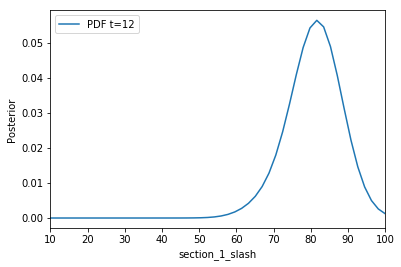

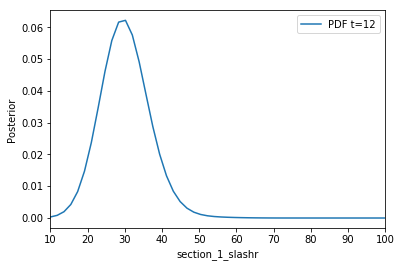

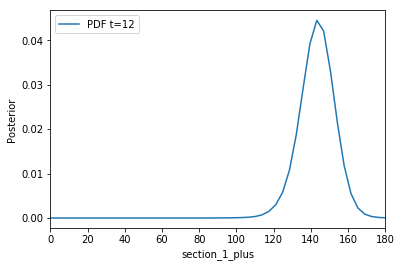

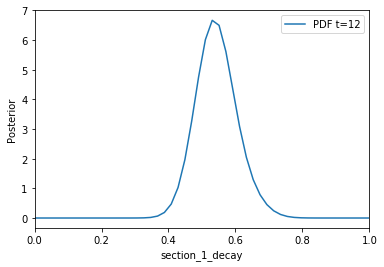

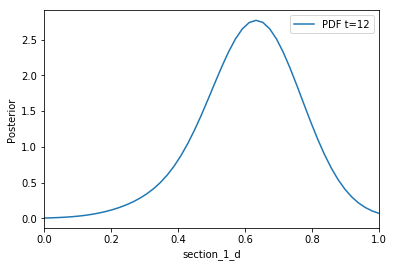

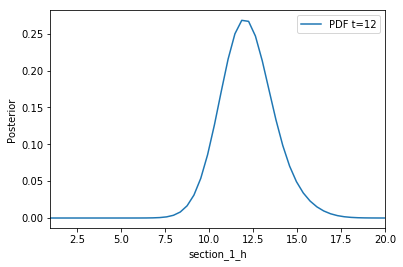

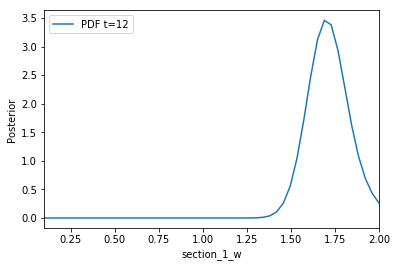

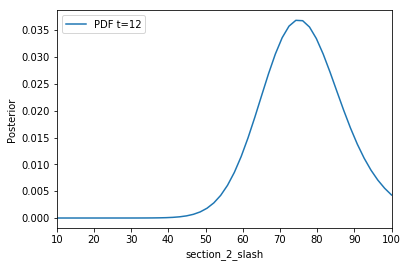

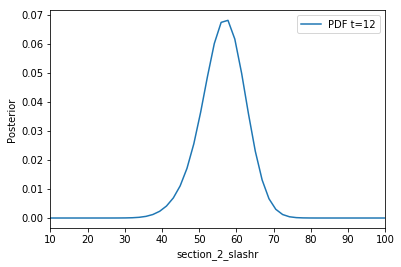

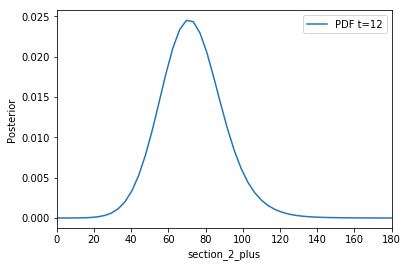

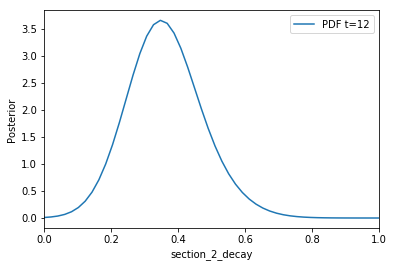

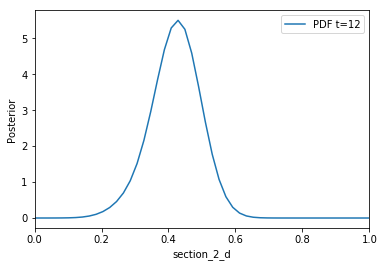

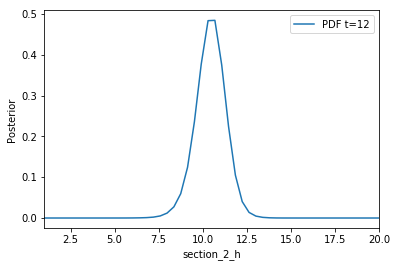

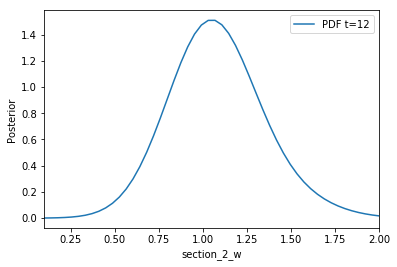

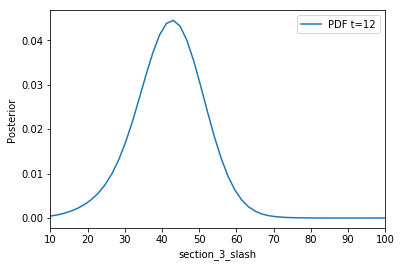

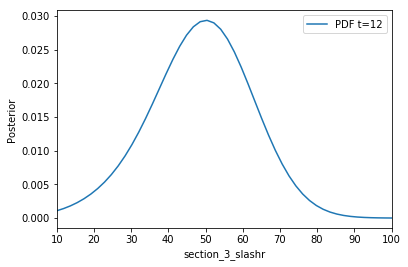

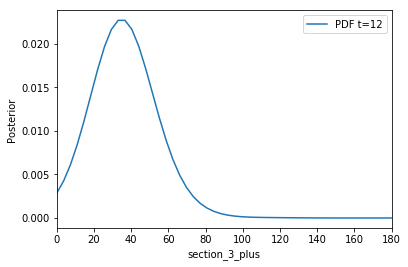

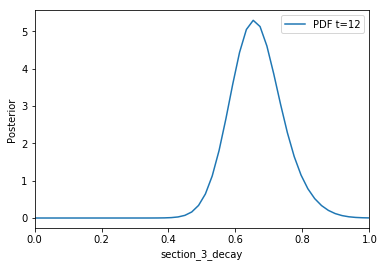

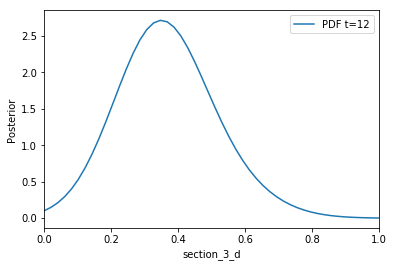

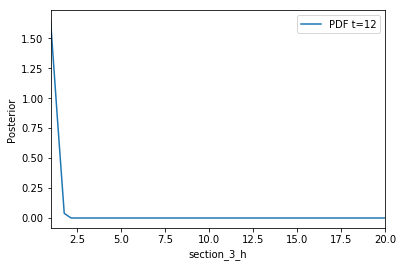

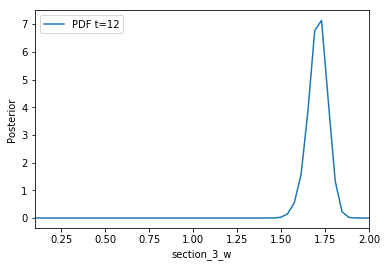

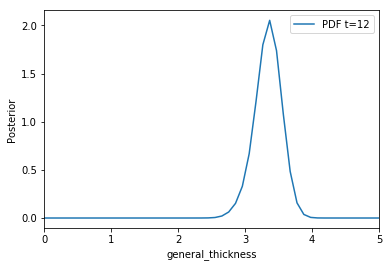

In [15]:
# Visualise results
from pyabc.visualization import plot_kde_1d
for (k,v) in metrics.items():
    fig, ax = plt.subplots()
    for t in range(history.max_t, history.max_t+1):
        df, w = history.get_distribution(m=0, t=t)
        plot_kde_1d(df, w,
                    xmin=v[0], xmax=v[1],
                    x=k, ax=ax,
                    label="PDF t={}".format(t))
    ax.legend();